# RNA Energy Barriers: Evaluation Functions

This notebook demonstrates how to use the evaluation functions to analyze and compare different path-finding algorithms for RNA energy barriers.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import RNA
import pandas as pd
import seaborn as sns

from src.rna_structure import RNAStructure
from src.path_finding import find_direct_path, find_best_indirect_path
import src.evolution as ev
import src.example_rna as ex
import src.evaluation as eval

%load_ext autoreload
%autoreload 2

# Enable nicer plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Basic Comparison of Path-Finding Methods

Let's start by comparing the different path-finding methods on the long example RNA sequence.

In [59]:
# Define the RNA sequence and structures
seq = ex.LONG_SEQ
start_struct = ex.LONG_START_STRUCT
end_struct = ex.LONG_END_STRUCT

print(f"Sequence: {seq}")
print(f"Start structure: {start_struct}")
print(f"End structure: {end_struct}")

Sequence: ACACGACCUCAUAUAAUCUUGGGAAUAUGGCCCAUAAGUUUCUACCCGGCAACCGUAAAUUGCCGGACUAUGCAGGGAAGUG
Start structure: ......................(....................)....(.............)...................
End structure: .(((..(((((((......((((.......))))...........(((((((.......)))))))..)))).)))...)))


Now, let's compare the different algorithms using our evaluation functions:

In [64]:
# Compare algorithms
results = eval.compare_algorithms(
    seq, 
    start_struct, 
    end_struct, 
    methods=['direct', 'indirect', 'evolutionary'],
    evolutionary_params={'N': 200, 'max_steps': 100},
    indirect_attempts=10
)



Base pair distance between structures: 21
Attempt 1: path length = 2214, energy barrier = 299982.31 - Skipping (above threshold)
Attempt 2: path length = 2216, energy barrier = 399984.97 - Skipping (above threshold)
Attempt 3: path length = 60, energy barrier = 0.00
New best barrier: 0.00
Attempt 4: path length = 62, energy barrier = 8.90
Attempt 5: path length = 2218, energy barrier = 499989.38 - Skipping (above threshold)
Attempt 6: path length = 2216, energy barrier = 499987.22 - Skipping (above threshold)
Attempt 7: path length = 2214, energy barrier = 599978.81 - Skipping (above threshold)
Attempt 8: path length = 32, energy barrier = 0.00
Attempt 9: path length = 1632, energy barrier = 399977.78 - Skipping (above threshold)
Attempt 10: path length = 168, energy barrier = 199974.50 - Skipping (above threshold)
Attempt 11: path length = 2220, energy barrier = 599974.31 - Skipping (above threshold)
Attempt 12: path length = 106, energy barrier = 0.00

Generation 10:
{'structure': '.

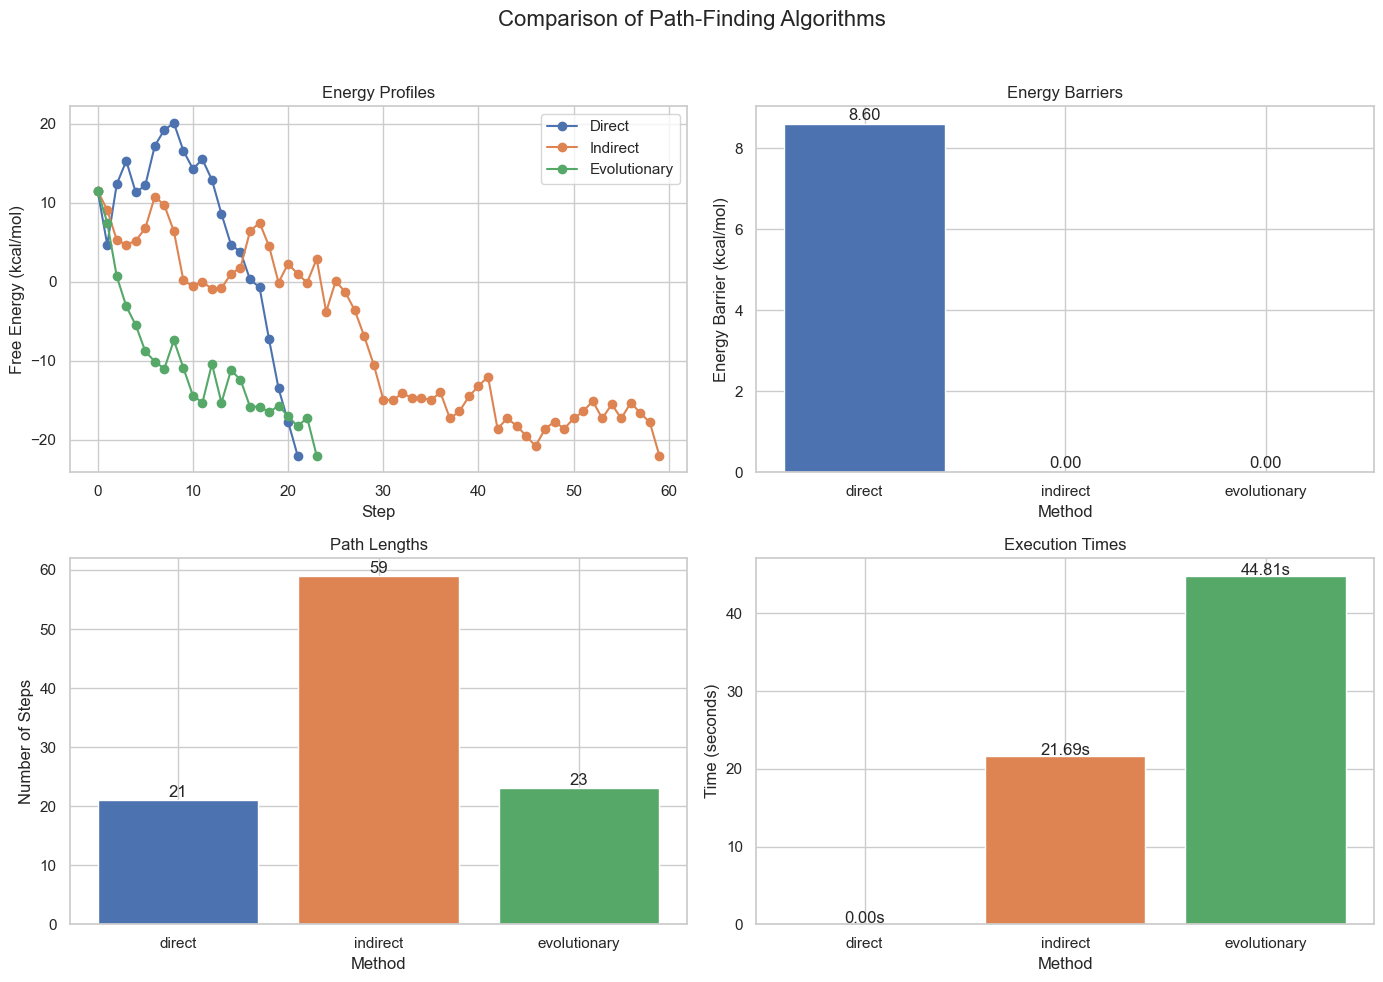

In [65]:
# Plot comparison
eval.plot_comparison(results, figsize=(14, 10))

## 2. Energy Landscape Visualization

Let's visualize the energy landscape and the paths taken by different algorithms:

In [30]:
# Collect all structures from all paths
all_structures = set()
paths = {}

for method, metrics in results.items():
    path = []
    for i, struct in enumerate(metrics['transitions']):
        if i == 0:
            path.append(struct[0])
        path.append(struct[1])
        all_structures.add(struct[0])
        all_structures.add(struct[1])
    paths[method] = path

all_structures = list(all_structures)

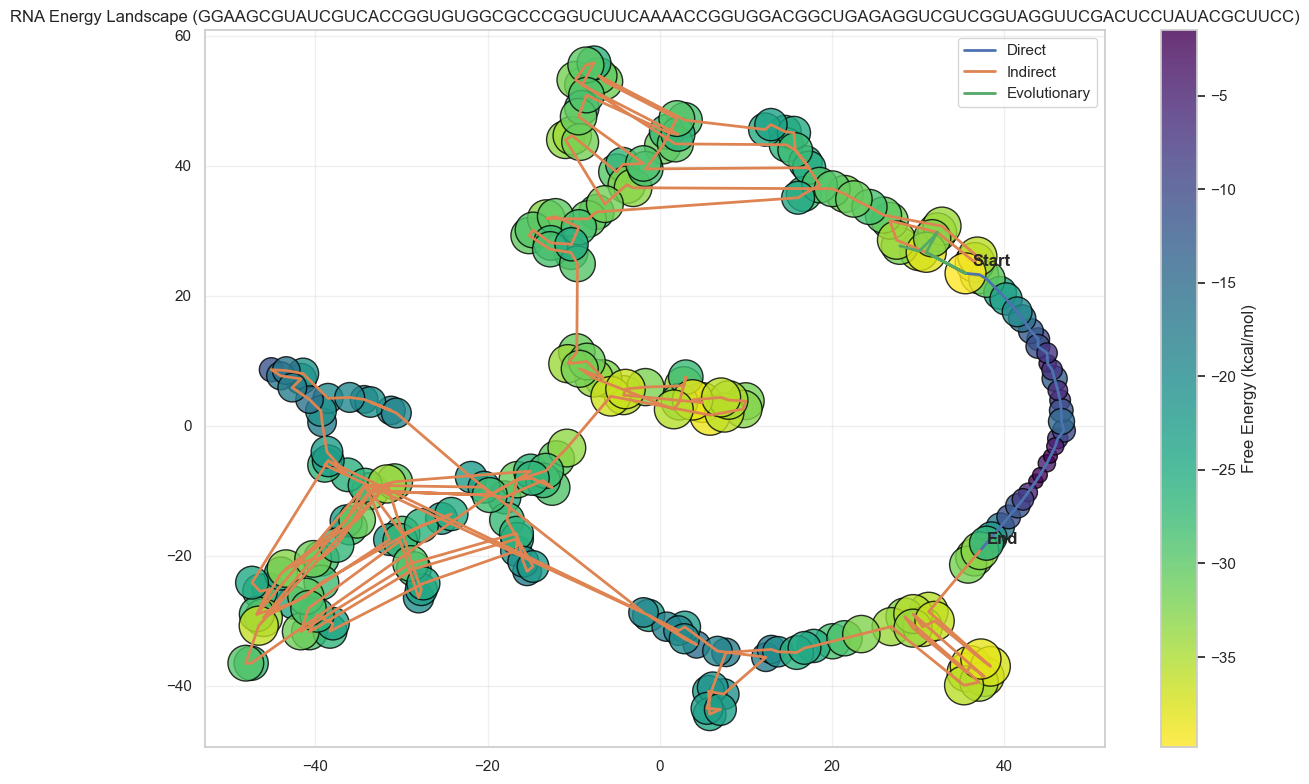

In [31]:
# Generate labels for start and end structures
labels = []
for struct in all_structures:
    if struct == start_struct:
        labels.append('Start')
    elif struct == end_struct:
        labels.append('End')
    else:
        labels.append('')

# Visualize the energy landscape
eval.energy_landscape_visualization(
    seq, 
    all_structures, 
    title=f"RNA Energy Landscape ({seq})", 
    figsize=(12, 8),
    point_labels=labels,
    highlight_paths=paths
)

## 3. Analyzing Multiple RNA Sequences

Let's analyze both the short and long RNA examples:

In [32]:
# Define sequences, start structures, and end structures
sequences = [ex.MED_SEQ, ex.LONG_SEQ, ex.ANOTHER_SEQ, ex.MOD_SEQ] #ex.VLONG_SEQ,
start_structs = [ex.MED_START_STRUCT, ex.LONG_START_STRUCT, ex.ANOTHER_START_STRUCT, ex.MOD_START_STRUCT] #ex.VLONG_START_STRUCT, 
end_structs = [ex.MED_END_STRUCT, ex.LONG_END_STRUCT, ex.ANOTHER_END_STRUCT, ex.MOD_END_STRUCT] #ex.VLONG_END_STRUCT, 
sequence_names = ["MED RNA", "Long RNA", "VLong RNA", "Another RNA", "Mod RNA"]

# Run batch analysis
batch_results = eval.batch_analysis(
    sequences, 
    start_structs, 
    end_structs, 
    sequence_names=sequence_names,
    methods=['direct', 'indirect', 'evolutionary']
)

# Display batch results
batch_results

Analyzing MED RNA...
Base pair distance between structures: 32
Attempt 1: path length = 1523, energy barrier = 300018.89 - Skipping (above threshold)
Attempt 2: path length = 517, energy barrier = 300025.61 - Skipping (above threshold)
Attempt 3: path length = 2153, energy barrier = 300029.80 - Skipping (above threshold)
Attempt 4: path length = 2169, energy barrier = 500016.21 - Skipping (above threshold)
Attempt 5: path length = 907, energy barrier = 300025.39 - Skipping (above threshold)
Attempt 6: path length = 2325, energy barrier = 300039.30 - Skipping (above threshold)
Attempt 7: path length = 1011, energy barrier = 300021.21 - Skipping (above threshold)
Direct path barrier: 38.30

Generation 10:
{'structure': '((((((((((.(.(((((((..(((.....)))......)))))))((((((......))))))((.((......)))))))))))))))', 'distance': 29, 'highest_energy': 4.299999237060547, 'path': ['((((((((((...(((((((..(((.....)))......)))))))(((((((....)))))))((.((......)))).))))))))))', '((((((((((...(((((((.(

,Sequence,Length,Method,Energy Barrier,Path Length,Execution Time (s),Initial Energy,Final Energy,Average Energy
0,MED RNA,90,Direct,38.299999,32,0.000000,-39.799999,-33.200001,-13.899091
1,MED RNA,90,Indirect,38.299999,32,19.944298,-39.799999,-33.200001,-13.899091
2,MED RNA,90,Evolutionary,7.299999,7,13.253822,-39.799999,-32.500000,-36.525000
3,Long RNA,82,Direct,8.600000,21,0.001086,11.500000,-22.000000,6.339545
4,Long RNA,82,Indirect,0.000000,27,16.225733,11.500000,-22.000000,-5.566429
5,Long RNA,82,Evolutionary,0.000000,23,19.263318,11.500000,-22.000000,-10.787500
6,VLong RNA,72,Direct,24.300000,23,0.000000,-29.400000,-33.599998,-16.437083
7,VLong RNA,72,Indirect,17.599999,51,1.917848,-29.400000,-33.599998,-20.648077
8,VLong RNA,72,Evolutionary,5.299999,17,8.870277,-29.400000,-24.100000,-29.083333
9,Another RNA,70,Direct,7.000000,11,0.000000,-23.799999,-28.900000,-21.225000


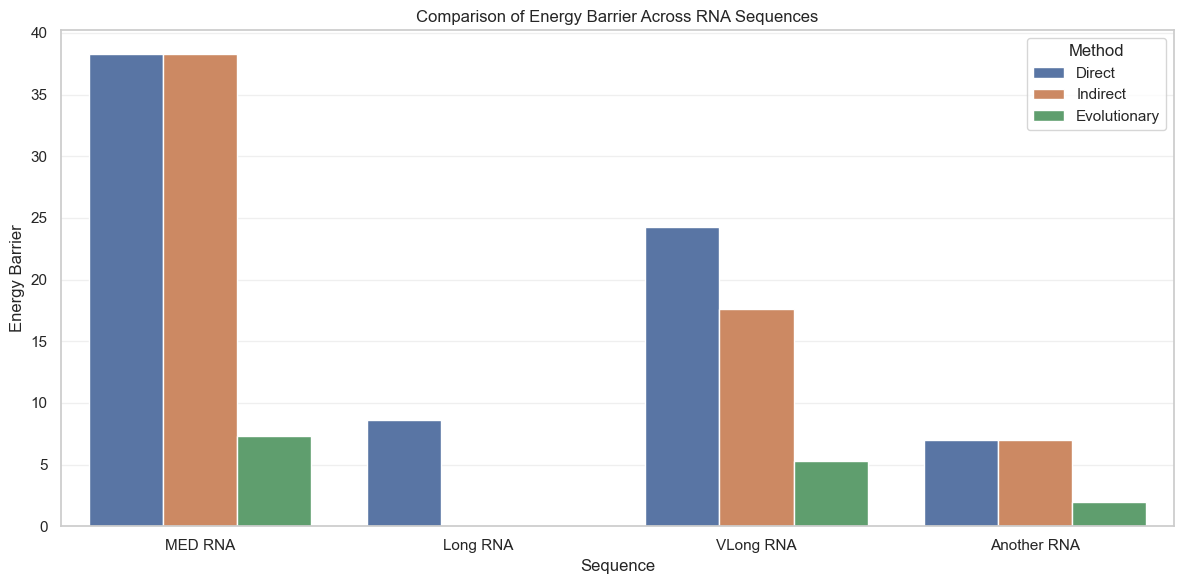

In [33]:
# Compare energy barriers across sequences and methods
eval.plot_sequence_comparison(batch_results, metric='Energy Barrier')

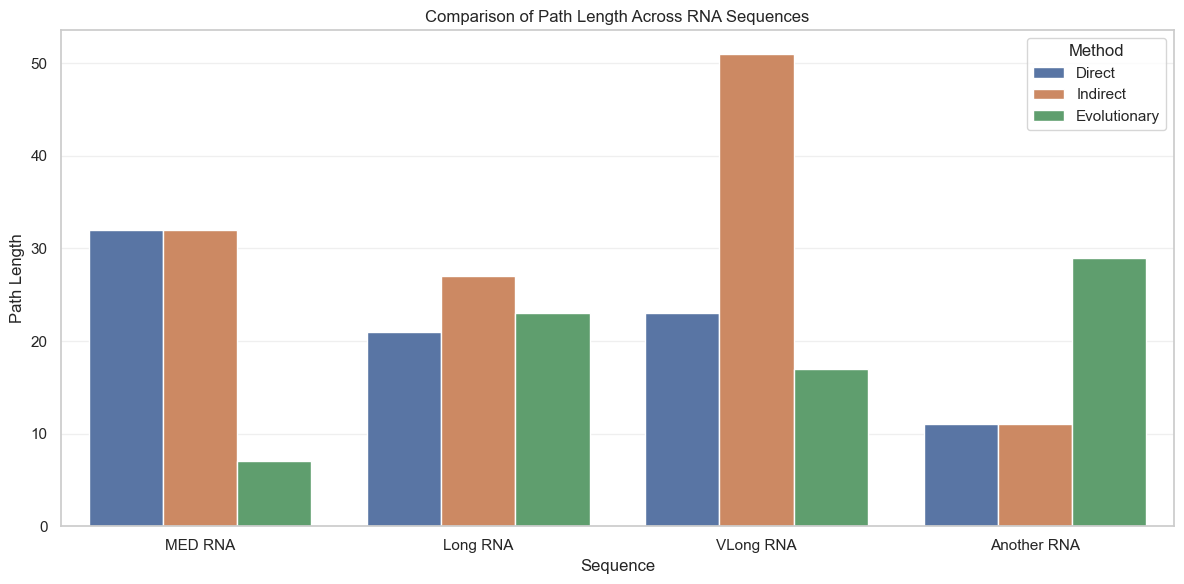

In [34]:
# Compare path lengths across sequences and methods
eval.plot_sequence_comparison(batch_results, metric='Path Length')

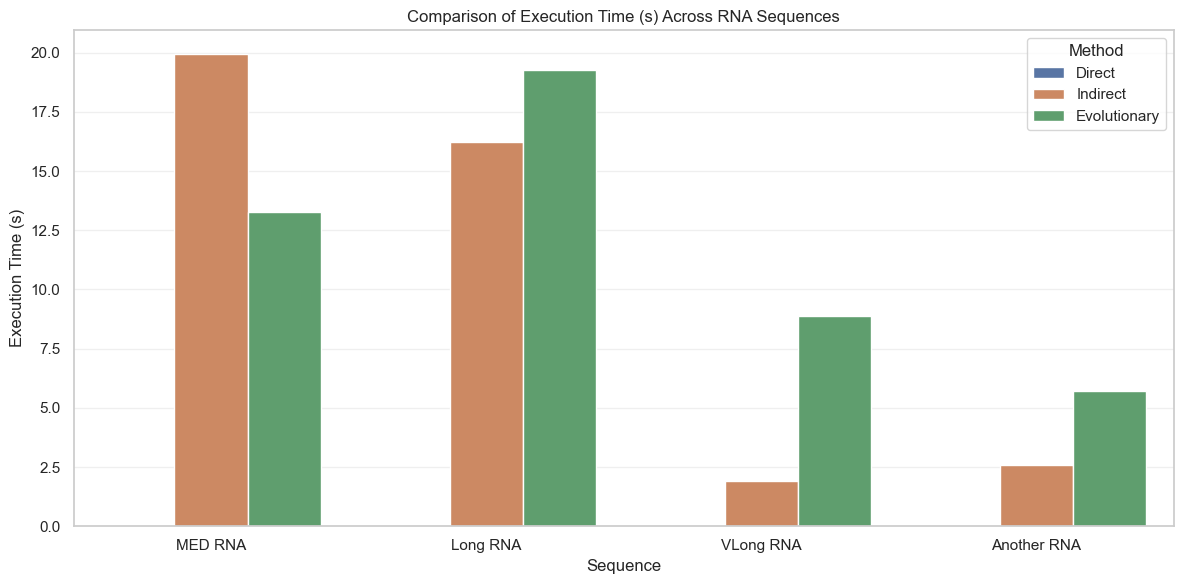

In [35]:
# Compare execution times across sequences and methods
eval.plot_sequence_comparison(batch_results, metric='Execution Time (s)')

## 4. Correlation Analysis

Let's analyze the correlations between sequence properties and algorithm performance:

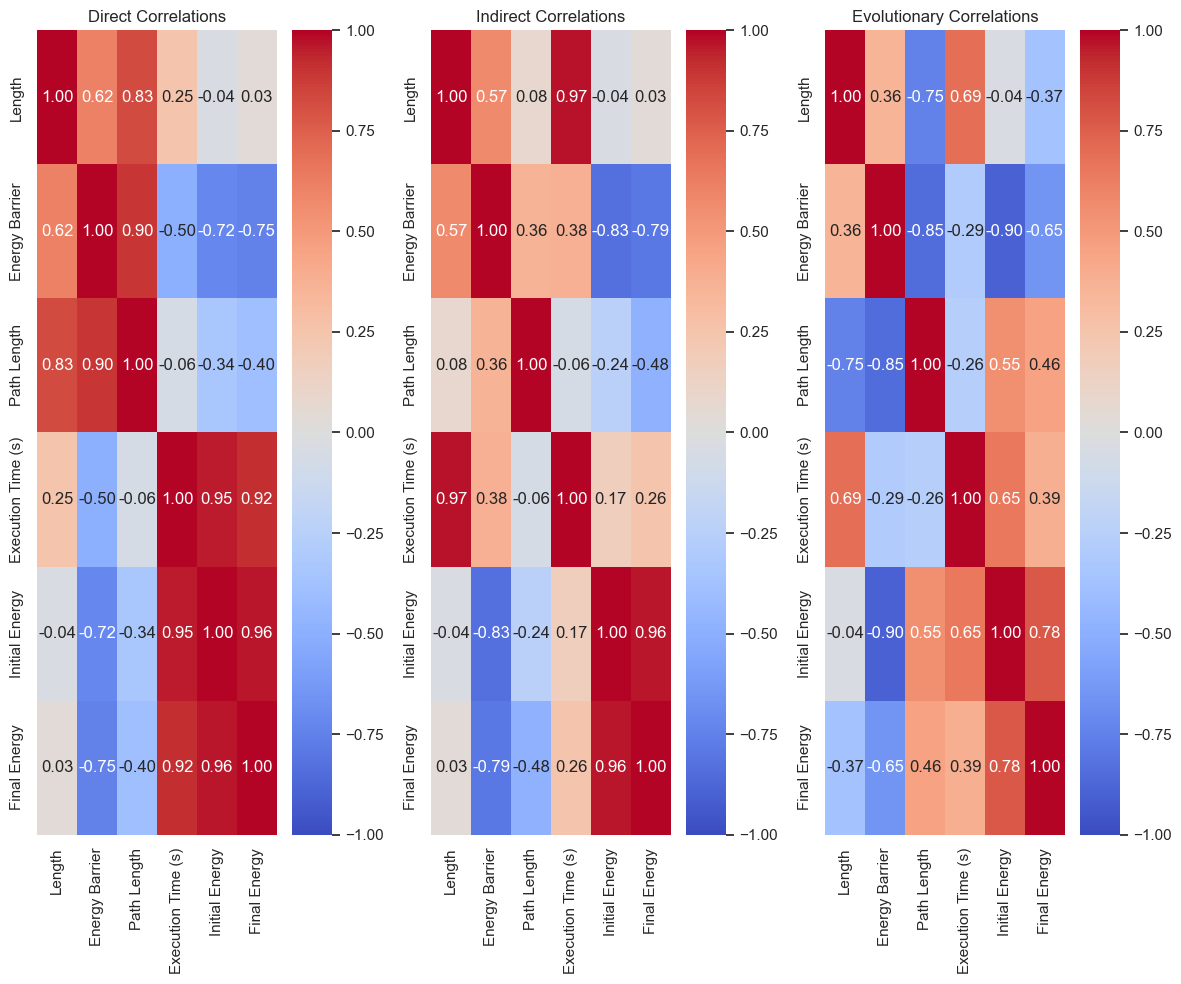

In [36]:
# Perform correlation analysis
correlation_results = eval.correlation_analysis(batch_results)

# Plot correlation matrix
eval.plot_correlation_matrix(correlation_results)

## 5. Success Rate Analysis

Let's analyze the success rates of different algorithms based on custom criteria:

In [37]:
# Analyze success rates with energy threshold and time limit
success_df = eval.analyze_success_rates(
    ex.LONG_SEQ,
    ex.LONG_START_STRUCT,
    ex.LONG_END_STRUCT,
    num_trials=2,
    methods=['direct', 'indirect', 'evolutionary'],
    energy_threshold=3.0,
)

# Display success rates
success_df

Trial 1/2
Base pair distance between structures: 21
Error in attempt 1: (3, 79)
Attempt 2: path length = 98, energy barrier = 7.50
New best barrier: 7.50
Attempt 3: path length = 2216, energy barrier = 399985.09 - Skipping (above threshold)
Attempt 4: path length = 1082, energy barrier = 299986.09 - Skipping (above threshold)
Attempt 5: path length = 2218, energy barrier = 499993.38 - Skipping (above threshold)
Attempt 6: path length = 2216, energy barrier = 399984.97 - Skipping (above threshold)
Attempt 7: path length = 2216, energy barrier = 499980.19 - Skipping (above threshold)

Generation 10:
{'structure': '...(................((........)).............(((((((.......))))))).........)......', 'distance': 22, 'highest_energy': 0, 'path': ['......................(....................)....(.............)...................', '................................................(.............)...................', '................................................((...........)).............

,Method,Success Count,Total Trials,Success Rate (%),Avg Energy Barrier,Avg Path Length,Avg Execution Time (s)
0,Direct,0,2,0.0,8.60,21.0,0.000500
1,Indirect,1,2,50.0,3.75,66.0,21.699830
2,Evolutionary,2,2,100.0,0.00,25.5,45.776057


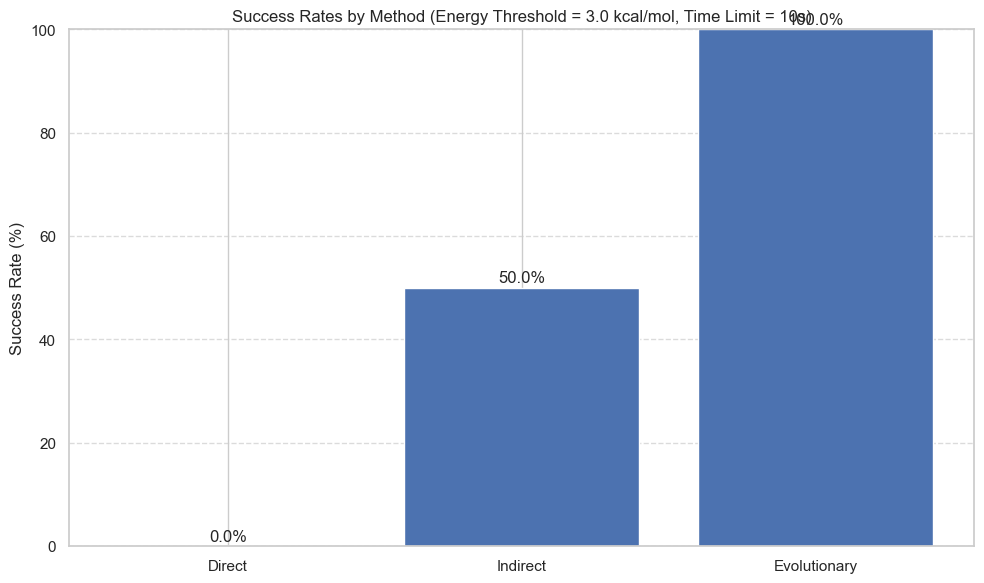

In [38]:
# Plot success rates
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(success_df['Method'], success_df['Success Rate (%)'])
ax.set_title('Success Rates by Method (Energy Threshold = 3.0 kcal/mol, Time Limit = 10s)')
ax.set_ylabel('Success Rate (%)')
ax.set_ylim(0, 100)
for i, v in enumerate(success_df['Success Rate (%)']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6. Advanced Analysis: Comparing Parameter Settings

Let's analyze how different parameter settings affect the performance of the evolutionary algorithm:

In [39]:
# Define parameter combinations to test
parameter_combinations = [
    {'N': 50, 'max_steps': 50, 'alpha': 0.7, 'beta': 0},
    {'N': 50, 'max_steps': 100, 'alpha': 0.7, 'beta': 0},
    {'N': 100, 'max_steps': 50, 'alpha': 0.7, 'beta': 0},
    {'N': 100, 'max_steps': 100, 'alpha': 0.7, 'beta': 0},
    {'N': 100, 'max_steps': 200, 'alpha': 0.7, 'beta': 0},
    {'N': 200, 'max_steps': 100, 'alpha': 0.7, 'beta': 0},
    {'N': 200, 'max_steps': 100, 'alpha': 0.5, 'beta': 0},
    {'N': 200, 'max_steps': 100, 'alpha': 0.7, 'beta': 0.5},
    {'N': 200, 'max_steps': 100, 'alpha': 0.5, 'beta': 0.5},
]

# Run analysis for each parameter combination
param_results = []

for params in parameter_combinations:
    # Create a unique name for this parameter combination
    param_name = f"Evo (N={params['N']}, steps={params['max_steps']}, α={params['alpha']}, β={params['beta']})"
    
    # Run the evolutionary algorithm with these parameters
    # start_struct = RNAStructure(ex.LONG_SEQ, structure=ex.LONG_START_STRUCT)
    # end_struct = RNAStructure(ex.LONG_SEQ, structure=ex.LONG_END_STRUCT)
    
    best, steps = ev.best_folding(
        ex.MED_SEQ, 
        ex.MED_START_STRUCT, 
        ex.MED_END_STRUCT, 
        N=params['N'], 
        max_steps=params['max_steps'], 
        alpha=params['alpha'],
        beta=params['beta']
    )
    
    # Calculate metrics
    metrics = eval.calculate_path_metrics(ex.LONG_SEQ, best['path'])
    
    param_results.append({
        'Parameter Set': param_name,
        'Energy Barrier': metrics['energy_barrier'],
        'Path Length': metrics['path_length'],
        'Average Energy': metrics['average_energy'],
        'Final Energy': metrics['final_energy'],
        'Max Energy': metrics['max_energy'],
        'Generation Steps': steps
    })

# Create DataFrame
param_df = pd.DataFrame(param_results)
param_df


Generation 10:
{'structure': '((((((((((.(.(((((((..(((.....)))......)))))))((((((......))))))((.((......)))))))))))))))', 'distance': 29, 'highest_energy': 4.299999237060547, 'path': ['((((((((((...(((((((..(((.....)))......)))))))(((((((....)))))))((.((......)))).))))))))))', '((((((((((...(((((((..(((.....)))......)))))))((((((......))))))((.((......)))).))))))))))', '((((((((((...(((((((..(((.....)))......)))))))(((((((....)))))))((.((......)))).))))))))))', '((((((((((...(((((((..(((.....)))......)))))))((((((......))))))((.((......)))).))))))))))', '((((((((((.(.(((((((..(((.....)))......)))))))((((((......))))))((.((......)))))))))))))))'], 'energy_profile': [0, -38.0, -39.79999923706055, -38.0, -35.5]}

Generation 20:
{'structure': '((((((((((.(.(((((((..(((.....)))......)))))))((((((......))))))((.((......)))))))))))))))', 'distance': 29, 'highest_energy': 4.299999237060547, 'path': ['((((((((((...(((((((..(((.....)))......)))))))(((((((....)))))))((.((......)))).))))))))))',

,Parameter Set,Energy Barrier,Path Length,Average Energy,Final Energy,Max Energy,Generation Steps
0,"Evo (N=50, steps=50, α=0.7, β=0)",0.0,4,100000.0,100000.0,100000.0,50
1,"Evo (N=50, steps=100, α=0.7, β=0)",0.0,9,100000.0,100000.0,100000.0,100
2,"Evo (N=100, steps=50, α=0.7, β=0)",0.0,3,100000.0,100000.0,100000.0,50
3,"Evo (N=100, steps=100, α=0.7, β=0)",0.0,5,100000.0,100000.0,100000.0,100
4,"Evo (N=100, steps=200, α=0.7, β=0)",0.0,22,100000.0,100000.0,100000.0,200
5,"Evo (N=200, steps=100, α=0.7, β=0)",0.0,12,100000.0,100000.0,100000.0,100
6,"Evo (N=200, steps=100, α=0.5, β=0)",0.0,5,100000.0,100000.0,100000.0,100
7,"Evo (N=200, steps=100, α=0.7, β=0.5)",0.0,8,100000.0,100000.0,100000.0,100
8,"Evo (N=200, steps=100, α=0.5, β=0.5)",0.0,8,100000.0,100000.0,100000.0,100


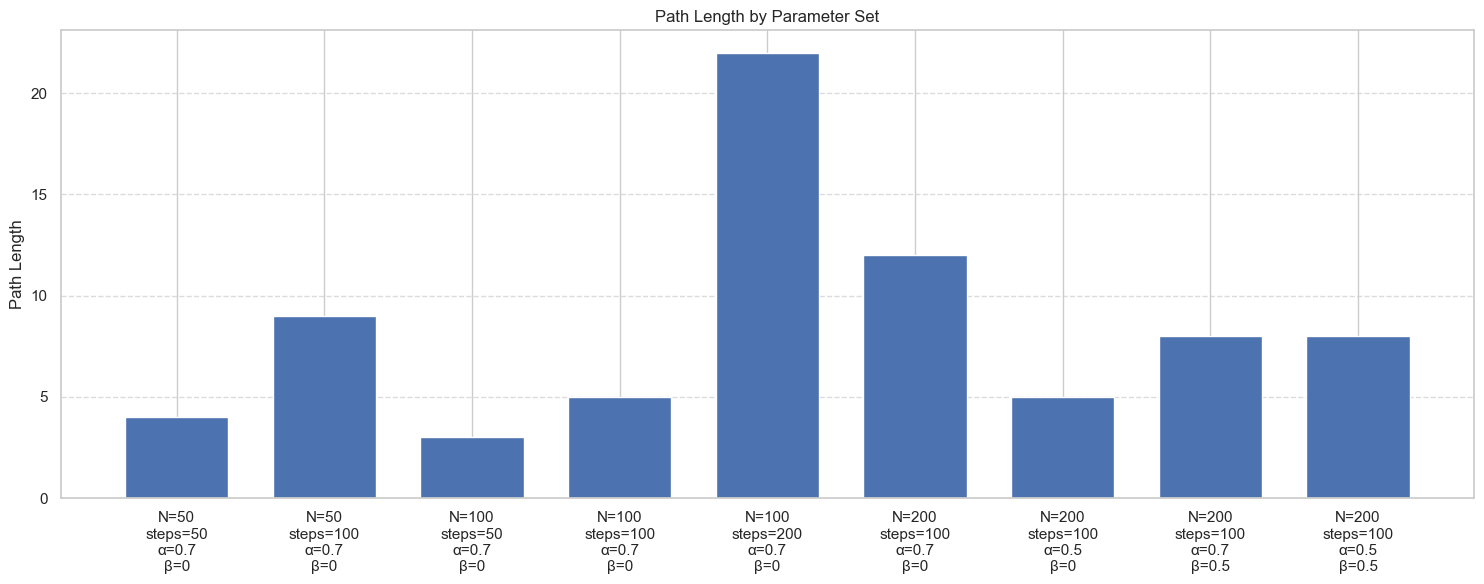

In [54]:
# Plot parameter comparison
fig, axs = plt.subplots(1, 1, figsize=(15, 6))

# # Plot energy barriers
# axs[0].bar(param_df['Parameter Set'], param_df['Energy Barrier'])
# axs[0].set_title('Energy Barrier by Parameter Set')
# axs[0].set_ylabel('Energy Barrier (kcal/mol)')
# axs[0].tick_params(axis='x', rotation=45)
# axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot path lengths
# Extract parameters from each entry
formatted_params = param_df['Parameter Set'].apply(lambda x: 
    x.replace("Evo (", "")  # Remove "Evo ("
     .replace(")", "")      # Remove ")"
     .replace(", ", "\n")   # Add line breaks between parameters
)
axs.bar(formatted_params, param_df['Path Length'], width=0.7)  # Reduce bar width
axs.set_title('Path Length by Parameter Set')
axs.set_ylabel('Path Length')
axs.tick_params(axis='x', rotation=0)
axs.grid(axis='y', linestyle='--', alpha=0.7)

# Add more spacing between x-axis labels
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin
plt.tight_layout()
plt.show()

## 7. Conclusion

In this notebook, we demonstrated various evaluation functions for analyzing RNA energy barriers and comparing different path-finding algorithms. These functions provide insights into:

1. Comparing energy barriers, path lengths, and execution times of different methods
2. Analyzing transition types in folding paths
3. Visualizing the energy landscape and paths
4. Batch analysis of multiple RNA sequences
5. Correlation analysis between sequence properties and algorithm performance
6. Success rate analysis based on custom criteria
7. Parameter sensitivity analysis for the evolutionary algorithm

These evaluation functions can be applied to different RNA folding problems to gain insights into the performance and behavior of various path-finding algorithms.